# Working with Text data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

#### Applying bag-of-words to a toy dataset

In [2]:
bards_words = ["The fool doth think he is wise,",
               "but the wise man knows himself to be a fool"]

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [4]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [5]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [6]:
print("Dense representation of bag_of_words:\n{}".format(
      bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [7]:
vect.get_feature_names()

['be',
 'but',
 'doth',
 'fool',
 'he',
 'himself',
 'is',
 'knows',
 'man',
 'the',
 'think',
 'to',
 'wise']

In [8]:
vect.inverse_transform(bag_of_words)

[array(['doth', 'fool', 'he', 'is', 'the', 'think', 'wise'],
       dtype='<U7'),
 array(['be', 'but', 'fool', 'himself', 'knows', 'man', 'the', 'to', 'wise'],
       dtype='<U7')]

### Task 1
Compute bigrams and trigrams of words as well. How does that change the vocabulary size? How would you imagine this changes the vocabulary size in a real application?

In [9]:
bvect = CountVectorizer(ngram_range=(1, 3))
bvect.fit(bards_words)
print("Vocabulary size: {}".format(len(bvect.vocabulary_)))
print("Vocabulary content:\n {}".format(bvect.vocabulary_))

Vocabulary size: 39
Vocabulary content:
 {'the': 25, 'fool': 8, 'doth': 5, 'think': 30, 'he': 11, 'is': 17, 'wise': 36, 'the fool': 26, 'fool doth': 9, 'doth think': 6, 'think he': 31, 'he is': 12, 'is wise': 18, 'the fool doth': 27, 'fool doth think': 10, 'doth think he': 7, 'think he is': 32, 'he is wise': 13, 'but': 2, 'man': 22, 'knows': 19, 'himself': 14, 'to': 33, 'be': 0, 'but the': 3, 'the wise': 28, 'wise man': 37, 'man knows': 23, 'knows himself': 20, 'himself to': 15, 'to be': 34, 'be fool': 1, 'but the wise': 4, 'the wise man': 29, 'wise man knows': 38, 'man knows himself': 24, 'knows himself to': 21, 'himself to be': 16, 'to be fool': 35}


# Download data from http://ai.stanford.edu/~amaas/data/sentiment/
# Delete the ``train/unsup`` folder.

# Sentiment analysis of movie reviews

In [10]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisio

In [11]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [12]:
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


In [13]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


### Representing text data as Bag of Words

![bag_of_words](bag_of_words.png)

### Task 2

Use the ``CountVectorizer`` to build a vocabulary and create a bag of word representation of the training data.

How big is the vocabulary?

Display some of the words in the vocabulary using ``get_feature_names()``.
What is 5 most common words?
What is the 5 most common words with ``stop_words='english'``?

In [14]:
vect = CountVectorizer()
vect.fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)
feature_names = vect.get_feature_names()
print(feature_names[:50])

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m']


In [15]:
import operator
sorted_vocab = sorted(vect.vocabulary_.items(), key=operator.itemgetter(1))
print(sorted_vocab[-6:-1])

[('êxtase', 74843), ('ís', 74844), ('ísnt', 74845), ('østbye', 74846), ('über', 74847)]


In [22]:
vect = CountVectorizer(stop_words="english")
vect.fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)
feature_names = vect.get_feature_names()
print(feature_names[:50])

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m']


In [23]:
sorted_vocab = sorted(vect.vocabulary_.items(), key=operator.itemgetter(1))
print(sorted_vocab[-6:-1])

[('êxtase', 74532), ('ís', 74533), ('ísnt', 74534), ('østbye', 74535), ('über', 74536)]


### Task 3
Build a ``LogisticRegression`` model on the dataset.
Extract the features with the largest coefficients (10 most positive and 10 most negative) and visualize them in a bar plot.
Do these make sense?

Then evaluate the model on the test set.

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
lrcoef_argsorted = np.argsort(lr.coef_[0,:])
feature_names_array = np.array(vect.get_feature_names())
words = []
values = []
for i in range(0,10):
    name = feature_names[lrcoef_argsorted[i]]
    val = lr.coef_[0,lrcoef_argsorted[i]]
    words.append(name)
    values.append(val)

for i in range(-10,0):
    name = feature_names[lrcoef_argsorted[i]]
    val = lr.coef_[0,lrcoef_argsorted[i]]
    words.append(name)
    values.append(val)


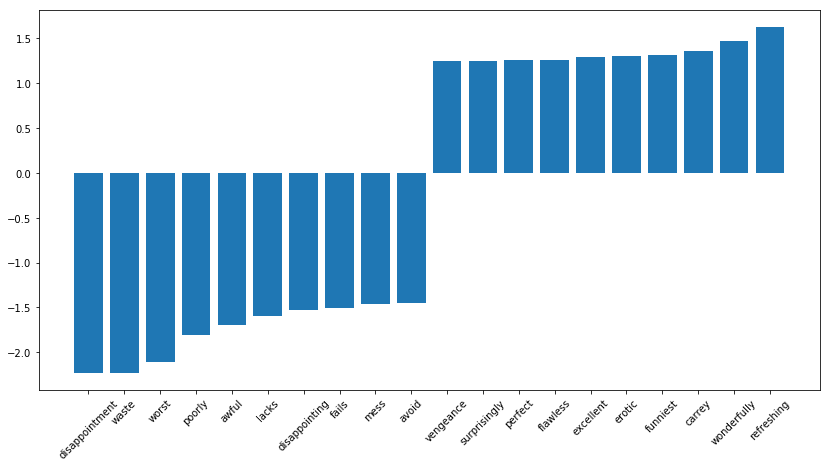

In [26]:
x = np.arange(20)
fig, ax = plt.subplots(figsize=(14,7))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.bar(x, values)
plt.xticks(x, words)
plt.show()

In [27]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.99808
0.86008


### Task 4
Use stop words and a minimum document frequency to limit the number of features. How does that impact the result?
Then add bigrams.

In [28]:
vect = CountVectorizer(stop_words="english",min_df=0.01)
vect.fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

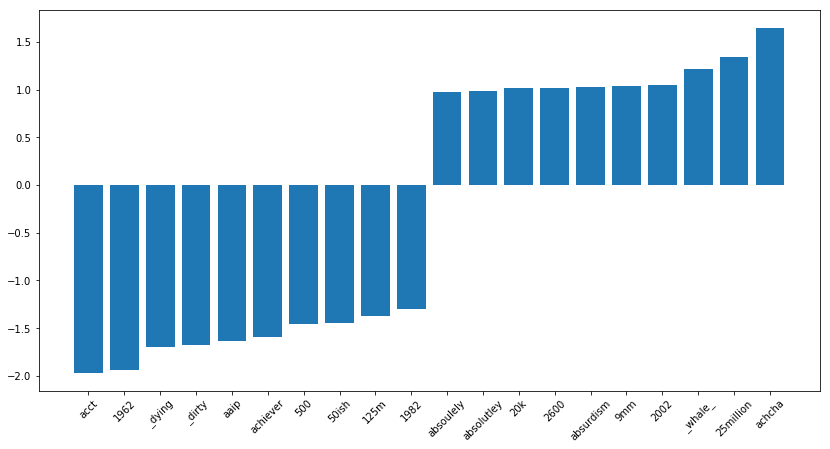

In [29]:
lrcoef_argsorted = np.argsort(lr.coef_[0,:])
feature_names_array = np.array(vect.get_feature_names())
words = []
values = []
for i in range(0,10):
    name = feature_names[lrcoef_argsorted[i]]
    val = lr.coef_[0,lrcoef_argsorted[i]]
    words.append(name)
    values.append(val)

for i in range(-10,0):
    name = feature_names[lrcoef_argsorted[i]]
    val = lr.coef_[0,lrcoef_argsorted[i]]
    words.append(name)
    values.append(val)
x = np.arange(20)
fig, ax = plt.subplots(figsize=(14,7))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.bar(x, values)
plt.xticks(x, words)
plt.show()

In [30]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.89516
0.85776


In [31]:
vect = CountVectorizer(stop_words="english",ngram_range=(1,2))
vect.fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
lrcoef_argsorted = np.argsort(lr.coef_[0,:])
feature_names_array = np.array(vect.get_feature_names())
words = []
values = []
for i in range(0,10):
    name = feature_names[lrcoef_argsorted[i]]
    val = lr.coef_[0,lrcoef_argsorted[i]]
    words.append(name)
    values.append(val)

for i in range(-10,0):
    name = feature_names[lrcoef_argsorted[i]]
    val = lr.coef_[0,lrcoef_argsorted[i]]
    words.append(name)
    values.append(val)
x = np.arange(20)
fig, ax = plt.subplots(figsize=(14,7))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.bar(x, values)
plt.xticks(x, words)
plt.show()

IndexError: list index out of range

### Task 5
Use GridSearchCV to adjust the ``C`` parameter in LogisticRegression.

In [ ]:
# TODO
vect = CountVectorizer(stop_words="english")
vect.fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)
param_grid = {'C':  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 0.8 0.9, 1.0]}
grid = GridSearchCV(LogisitcRegression(), param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

## Pipelines
Scikit-learn has a ``Pipeline`` class that allows chaining of multiple transformations with a model. We can chain the ``CountVectorizer`` with the ``LogisticRegression`` and search over the ``C`` and the size of the n-grams at the same time

### Task 6
Complete the code below to search over whether to use unigrams or unigrams and bigrams.

In [ ]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(CountVectorizer(), LogisticRegression())
# there are two steps in the pipeline, here are their names:
print(pipeline.named_steps.keys())
print(pipeline.named_steps)

In [ ]:
param_grid = {'countvectorizer__ngram_range': #fill in ngram settings,
              'logisticregression__C': # fill in settings of C}
grid = GridSearchCV(pipeline, param_grid, cv=5, verbose=10)
grid.fit(text_train, y_train)

In [ ]:
# look at grid.cv_results_